# Project 2
## Scientific Question: Can images of blood cells be classified as normal or sickle as a way to help diagnose sickle cell anemia?
Sicke cell anemia occurs when an individual has a mutation in their hemoglobin beta gene(HBB) where glutamic acid is replaced by valine. This mutation causes production of abnormal hemoglobin S(HbS) instead of normal hemoglobin (HbA). When red blood cells carry the abnormal hemoglobin, they become sickle shaped because they lack oxygen and stick together which makes it difficult for them to travel through blood vessels (U.S. National Library of Medicine, 2000).
## Scientific Hypothesis: If there are physiological differences that can be shown in images between normal and sickle red blood cells, then a model can be trained to categorize images of blood cells into each type.
I began by creating a training and validation dataset that both had folders named "normal" or "sickle cell". The training dataset had a total of 14 images, 7 of normal and 7 of sickle cell. The validation dataset had a total of 10 images, 5 of normal and 5 of sickle cell. The training set is used to build the model and the validation dataset is used to tune the parameters of the model. There were 15 images in my testing folder that were not sorted into a normal or sickle cell folder. Thus, the test set doesn't have bias and it used to test for performance. The network was then trained with the training dataset and the validation dataset through a number of epoch. As the network ran through more epochs, the accuracy appeared to increase. 

An example of a past neural network is CheXNet, a convolutional neural network that classified more than 100,000 images of chest x-rays for disease diagnosis. Suprisingly, the neural network had achieved a better than average performance of 4 radiologists. They trained the CNN on two datasets: normal and pneumonia in order to to classify pneumonia (Yadav et al., 2019). I think 100,000 images is a good number since it provides a lot of variability since there are different types of pneumonia (i.e. bacterial, viral, or COVID-19) that may have different appearances from one another. My network would likely be more accurate and reliable if I had used hundreds of images rather than a few. 

The images I used for my model were taken off Google Images.

### Packages loaded!

tensorflow: Tensorflow is used to create deep learning models that utilize multiple layers to produce predicted outputs after being trained with input and output data. I use it to train my neural network which images are normal or sickle red blood cells to make predictions on my test images.
ImageDataGenerator is used to run my images through my neural network and image to display my images in the code.

matplot.lib: The functions included in matplotlib allow the creation of figures, plots, graphs, etc. to visualize data. I use it to visualize my blood cell images as well as my ROC plot.

cv2: Cv2 is mainly used to process and analyze images or videos. By doing so, it can identify objects, faces, etc. to classify them into catergories.

os: Using OS in python gives me the ability to grab contents from a directory. In my case I used it to fetch images from folders within my computer by using a direct pathway. 

numpy: Numpy is a python package that is used for computing with arrays. 

sklearn: Sklearn is a useful tool for predictive data analysis in machine learning. Metrics is used to measure the accuracy of the neural networks ability to classify my images as shown in my ROC plot.

----

code credit: https://www.youtube.com/watch?v=uqomO_BZ44g&list=LL&index=1&t=908s

U.S. National Library of Medicine. (2000, May 1). Sickle hemoglobin (HbS) allele and sickle cell disease: a HuGE review. American journal of epidemiology. https://pubmed.ncbi.nlm.nih.gov/10791557/. 

Yadav, S. S., & Jadhav, S. M. (2019, December 17). Deep convolutional neural network based medical image classification for disease diagnosis. Journal of Big Data. https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0276-2.

Bonner, A. (2019, June 1). The Complete Beginner's Guide to Deep Learning: Convolutional Neural Networks. Medium. https://towardsdatascience.com/wtf-is-image-classification-8e78a8235acb#:~:text=A%20CNN%20works%20by%20extracting%20features%20from%20images.&amp;text=They're%20learned%20while%20the,or%20hundreds%20of%20hidden%20layers. 

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

(525, 700, 3)

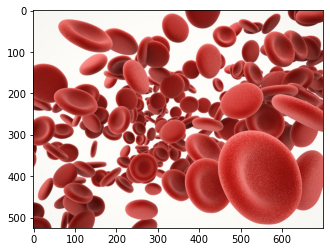

In [66]:
#testing if the direct pathway to the image in my folder works
img=image.load_img("dataset/base/training/normal/1.jpg")
plt.imshow(img)

#gives dimensions of the picture --> (525,700,3) indicates 3 dimensions
cv2.imread("dataset/base/training/normal/1.jpg").shape

# Bioinformatics Method: Deep neural network
A deep neural entwork utilizes multiple layers of input and output layers to model complex non-linear relationships to make predictions. In order for a model to increase its accuracy, it is trained with a set of data where the inputs are run through an activation function to generate an output. The validation dataset helps fine tune the model so that the error rate decreases the next round images are run through the model.

A deep neural network/convolution neural network has convolution layers, relu layers, pooling layers, and a fully connected layer. The convolution layer applies a convolution operation to the input to extract features from the image then passes the info ont othe next layer. ReLU is where we apply the activation function on the feature map to increase non-linearity in the network since the images used to train are generally non linear. The pooling layer combines the outputs of multiple neurons into a single neuron in the next layer and helps to prevent overfitting. Overfitting is when the CNN gets really good at classifying the training images but is essentially clueless whe exposed to new information. For example, you train a network to classify cows and horses and use images of only black and white cows. If you introduce an image of a brown cow, the network may not be able to accurately classify the animal. Then the fully connected layer connects every neuron in one layer to every neuron in the next layer (Bonner, 2019).

In [11]:
train = ImageDataGenerator(rescale=1/250)
validation = ImageDataGenerator(rescale =1/250)

In [59]:
#providing pathway to my folder with my training images and validation images
#giving me network a batch size= 1 to run through each time because i don't have many images
train_dataset = train.flow_from_directory("dataset/base/training/",
                                         target_size= (200,200),
                                         batch_size = 1,
                                         class_mode = 'binary')

validation_dataset = train.flow_from_directory("dataset/base/validation/",
                                         target_size= (200,200),
                                         batch_size = 1,
                                         class_mode = 'binary')

#class mode = binary because my 2 classes are either normal or sickle cell
#strings 'normal' and 'sickle cell' converted into numerical values for neural network predictions
#i put 14 images in training folder and 10 images in validation folder
train_dataset.class_indices

Found 14 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


{'normal': 0, 'sickle_cell': 1}

In [61]:
#value 0 indicates normal
#value 1 indicates sickle cell
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [13]:
#convolution network w/ max pooling
#layers given in form of lists
#16 filters and site of filters is 3,3
#relu and sigmoid: an activationf function
#increasing number of filters as we go down to increase # of channels read yt description
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                                           ])

In [37]:
model.compile(loss= 'binary_crossentropy',
             optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [62]:
#epochs are the number of times the neura network will work through the training dataset
model_fit= model.fit(train_dataset,
                    steps_per_epoch = 5,
                    epochs = 10,
                    validation_data=validation_dataset)
#accuracy seemed to increase as it went through more epochs

Epoch 1/10
5/5 [==============================] - 1s 315ms/step - loss: 15.9997 - accuracy: 0.6000 - val_loss: 0.7591 - val_accuracy: 0.7000
Epoch 2/10
5/5 [==============================] - 2s 414ms/step - loss: 2.2665 - accuracy: 0.8000 - val_loss: 4.9828 - val_accuracy: 0.6000
Epoch 3/10
5/5 [==============================] - 2s 390ms/step - loss: 3.1345 - accuracy: 0.8000 - val_loss: 1.4436 - val_accuracy: 0.5000
Epoch 4/10
5/5 [==============================] - 1s 316ms/step - loss: 0.3209 - accuracy: 0.8000 - val_loss: 1.5805 - val_accuracy: 0.7000
Epoch 5/10
5/5 [==============================] - 2s 326ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.5471 - val_accuracy: 0.7000
Epoch 6/10
5/5 [==============================] - 1s 317ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.4527 - val_accuracy: 0.7000
Epoch 7/10
5/5 [==============================] - 2s 382ms/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 1.2656 - val_accuracy: 0.6000
Epoch 8/10
5/5 [===

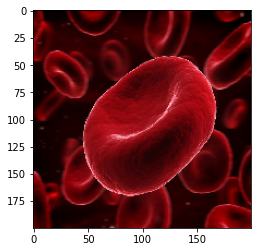

normal red blood cell


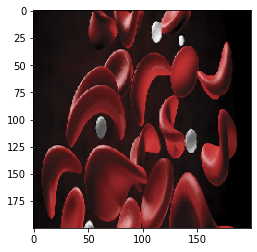

sickle cell


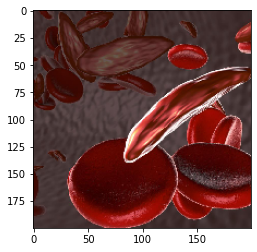

sickle cell


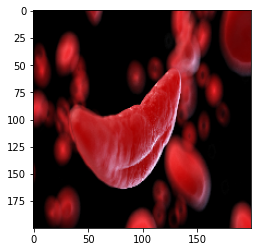

sickle cell


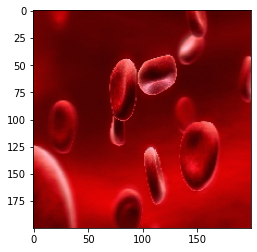

normal red blood cell


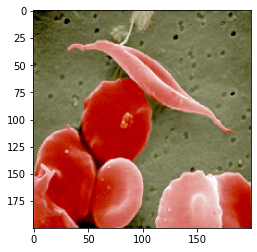

normal red blood cell


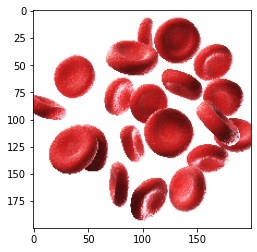

normal red blood cell


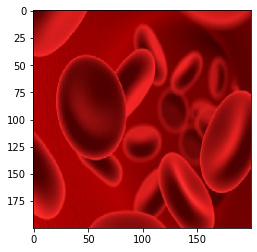

normal red blood cell


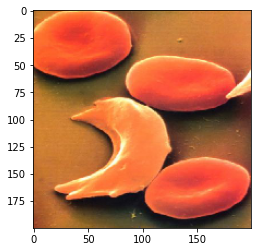

sickle cell


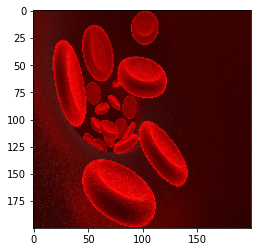

normal red blood cell


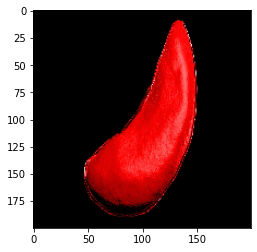

sickle cell


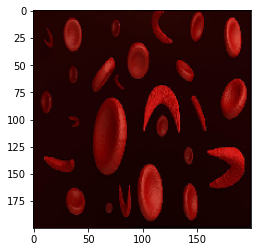

sickle cell


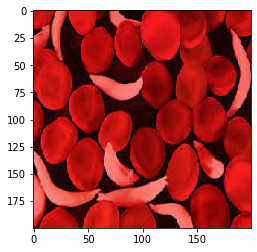

normal red blood cell


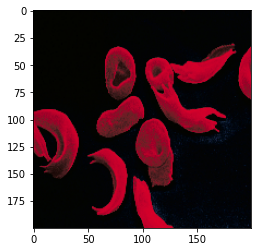

sickle cell


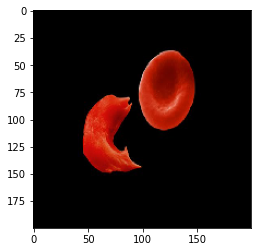

sickle cell


In [65]:
#listing and showing my images in my testing folder
dir_path = "dataset/base/testing"
for i in os.listdir(dir_path):
    img= image.load_img(dir_path+'//'+i, target_size=(200,200,3))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("normal red blood cell")
    else:
        print("sickle cell")
        
#out of the 15 images it classfied it got 13/15 correct
#crescent shape indicates sickle cell while full and round is normal

# Plotting Method: ROC plot
A receiver operating characteristic curve (or ROC plot) is used to convey the trade off between the true positive rate (sensitivity) and false positive rate (specificity) of classifiers. A model with an AUC value of 0.0 is completely incorrect while a value of 1.0 is completely correct.

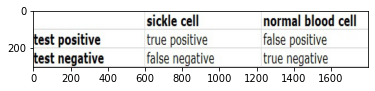

In [10]:
img=image.load_img("roc.jpg",target_size=(300,1800))
plt.imshow(img)

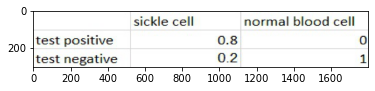

In [12]:
img=image.load_img("roc2.jpg",target_size=(300,1800))
plt.imshow(img)
#true positive rate = TP/TP+FN
#true negative rate = TN/TN+FP
#false negative rate = FN/FN+TP
#false positive rate = FP/FP+TN
#TP = 8
#FN = 2
#TN = 5
#FP = 0

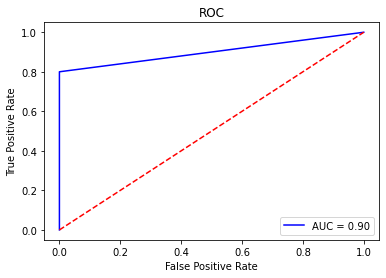

In [120]:
from sklearn import metrics
import numpy as np
from numpy import array
import matplotlib.pyplot as plt

def create_roc_curve(labels, scores, positive_label):
  fpr, tpr, thresholds = metrics.roc_curve(labels, scores, pos_label=positive_label)
  roc_auc = auc(fpr, tpr)

  plt.title('ROC')
  plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
  plt.legend(loc='lower right')
  plt.plot([0,1],[0,1],'r--')
  plt.xlim([-0.05,1.05])
  plt.ylim([-0.05,1.05])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

#true corresponds to output that should have been generated
#pred is the neural network's predicated output
#0 = normal red blood cell
#1 = sickle cell
true = np.array([0,1,1,1,0,1,0,0,1,0,1,1,1,1,1])
pred = np.array([0,1,1,1,0,0,0,0,1,0,1,1,0,1,1])

create_roc_curve(true, pred, 1)

The AUC value generated for my data is 0.9 which indicates the network is pretty accuracy with its ability to classify the images but not perfect. 
note: AUC plot for a two classification model will have the 13 correctly identified pictures at a 0 FPR and the two incorrectly identified pictures at the 1.0 FPR. Does that make sense? Make sure to complete your analysis by explicitly stating if your hypothesis was correct or not. 

My scientific hypothesis appears to be correct based on my model! The key difference between normal and sickle red blood cells is their shape. Normal red blood cells appear full and round while sickle red blood cells appear sickle shaped and can be wrinkly, like a raisin. My deep neural network model was able to classify images of red blood cells into normal or sickle cell with a relatively good accuracy. 